In [6]:
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

nltk.download('punkt')
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()
stopwords = set(w.rstrip() for w in open('stopwords.txt'))
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })

titles = [line.rstrip() for line in open('all_book_titles.txt')]

def my_tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]

    return tokens

word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []

for title in titles:
    try:
        title = title.encode('ascii', 'ignore').decode('utf-8')
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except Exception as e:
        print(title, e)

def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] += 1
    x /= x.sum()
    return x

N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((N, D))

i = 0

for tokens in all_tokens:
    xy = tokens_to_vector(tokens)
    X[i, :] = xy
    i += 1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


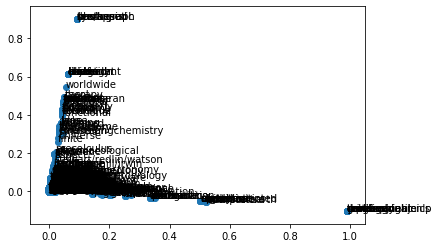

In [11]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

model = TruncatedSVD()
Z = model.fit_transform(X)
plt.scatter(Z[:, 0], Z[:, 1])
for i in range(D):
    plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
plt.show()